<a href="https://colab.research.google.com/github/desaraju02/ai_ml_dl/blob/main/Polynomial_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
df = pd.read_csv('Position_Salaries.csv')

In [3]:
df

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000
5,Region Manager,6,150000
6,Partner,7,200000
7,Senior Partner,8,300000
8,C-level,9,500000
9,CEO,10,1000000


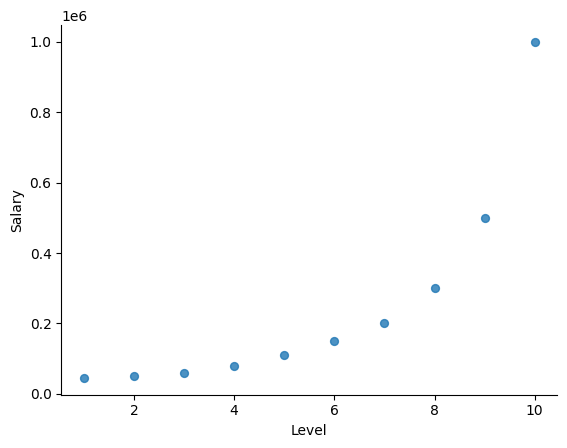

In [4]:
# @title Level vs Salary

from matplotlib import pyplot as plt
df.plot(kind='scatter', x='Level', y='Salary', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

In [10]:
#X = df.drop('Salary', axis=1)
#y = df['Salary']
X=df.iloc[:,1:-1].values
y=df.iloc[:,-1].values

In [11]:
X

array([[ 1],
       [ 2],
       [ 3],
       [ 4],
       [ 5],
       [ 6],
       [ 7],
       [ 8],
       [ 9],
       [10]])

In [12]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X,y)

LinearRegression()

### Create Polynomial Linear Regression

In [13]:
from sklearn.preprocessing import PolynomialFeatures

In [14]:
poly_reg = PolynomialFeatures(degree=2)
X_poly = poly_reg.fit_transform(X)

In [15]:
X_poly

array([[  1.,   1.,   1.],
       [  1.,   2.,   4.],
       [  1.,   3.,   9.],
       [  1.,   4.,  16.],
       [  1.,   5.,  25.],
       [  1.,   6.,  36.],
       [  1.,   7.,  49.],
       [  1.,   8.,  64.],
       [  1.,   9.,  81.],
       [  1.,  10., 100.]])

In [16]:
lin_reg_2 = LinearRegression()
lin_reg_2.fit(X_poly,y)

LinearRegression()

## Visualizing the Linear Regression Results


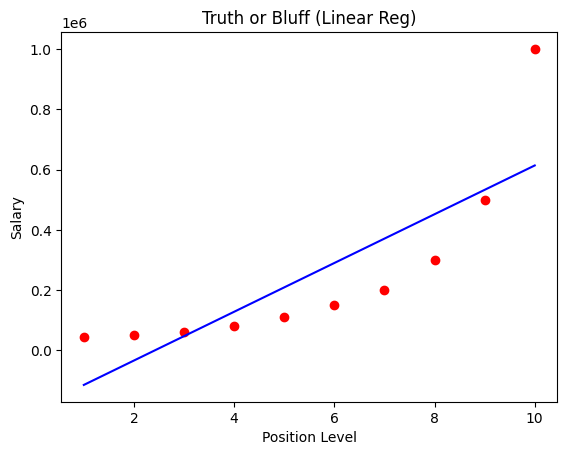

In [18]:
plt.scatter(X,y, color='r')
plt.plot(X,lin_reg.predict(X), color='b')
plt.title('Truth or Bluff (Linear Reg)')
plt.xlabel('Position Level')
plt.ylabel('Salary')
plt.show()

### Visualizing the Polynomial Linear Regression Results

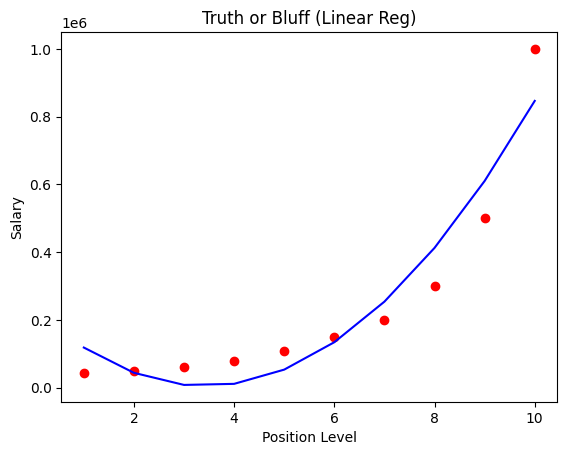

In [20]:
plt.scatter(X,y, color='r')
plt.plot(X,lin_reg_2.predict(X_poly), color='b')
plt.title('Truth or Bluff (Linear Reg)')
plt.xlabel('Position Level')
plt.ylabel('Salary')
plt.show()

## Retraining the Polynomial with higher degree

In [27]:
poly_reg = PolynomialFeatures(degree=4)
X_poly = poly_reg.fit_transform(X)
lin_reg_2 = LinearRegression()
lin_reg_2.fit(X_poly,y)

LinearRegression()

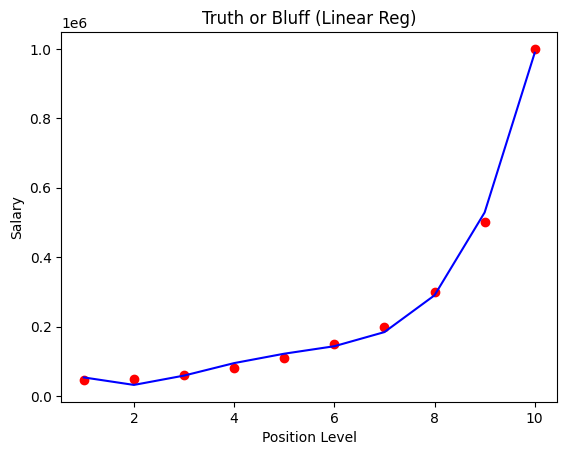

In [28]:
plt.scatter(X,y, color='r')
plt.plot(X,lin_reg_2.predict(X_poly), color='b')
plt.title('Truth or Bluff (Linear Reg)')
plt.xlabel('Position Level')
plt.ylabel('Salary')
plt.show()

## Visuallizing the Polynomial Regression Results ( for higher resolution and smoother curve)

<ipython-input-33-707cff6c1c66>:1: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  X_grid = np.arange(min(X), max(X), 0.0125)


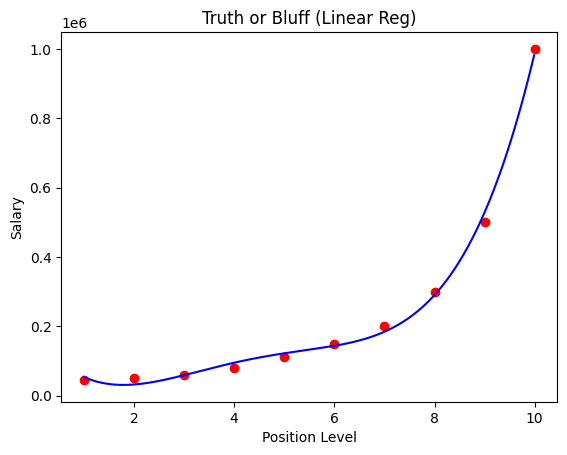

In [33]:
X_grid = np.arange(min(X), max(X), 0.0125)
X_grid = X_grid.reshape((len(X_grid),1))
plt.scatter(X,y, color='r')
plt.plot(X_grid,lin_reg_2.predict(poly_reg.fit_transform(X_grid)), color='b')
plt.title('Truth or Bluff (Linear Reg)')
plt.xlabel('Position Level')
plt.ylabel('Salary')
plt.show()

## Predicting new result with Linear Regression

In [36]:
lin_reg.predict([[6.5]])

array([330378.78787879])

## Predicting new result with Polynomial Linear Regression

In [37]:
lin_reg_2.predict(poly_reg.fit_transform([[6.5]]))

array([158862.45265155])